In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ellc
import batman

In [2]:
from tidef.phase_curve import deformed_PC, convert_radius

Initiate deformed and spherical planet models

In [4]:
def_PC = deformed_PC(ld_law='power-2', deformed=True)
sph_PC = deformed_PC(ld_law='power-2', deformed=False)

print default parameters of the models

In [5]:
print(f"{def_PC.pars=}")
print(f"{sph_PC.pars=}")

def_PC.pars={'t0': 0, 'P': 1, 'Rv': 0.1, 'aR': 3, 'inc': 90, 'e': 0, 'w': 90, 'ld_pars': [0.5, 0.5], 'qmass': 0.00098, 'Fp': 1000, 'Fn': 200, 'hf': 1.5, 'delta': 0, 'A_EV': 0, 'A_DB': 0}
sph_PC.pars={'t0': 0, 'P': 1, 'Rv': 0.1, 'aR': 3, 'inc': 90, 'e': 0, 'w': 90, 'ld_pars': [0.5, 0.5], 'qmass': 1, 'Fp': 1000, 'Fn': 200, 'hf': 0, 'delta': 0, 'A_EV': 0, 'A_DB': 0}


In [6]:
# change semi-amplitude of stellar ellipsoidal variation
sph_PC.pars["A_EV"] = def_PC.pars["A_EV"] = 100   #in ppm

print(f"{def_PC.pars=}")
print(f"{sph_PC.pars=}")


def_PC.pars={'t0': 0, 'P': 1, 'Rv': 0.1, 'aR': 3, 'inc': 90, 'e': 0, 'w': 90, 'ld_pars': [0.5, 0.5], 'qmass': 0.00098, 'Fp': 1000, 'Fn': 200, 'hf': 1.5, 'delta': 0, 'A_EV': 100, 'A_DB': 0}
sph_PC.pars={'t0': 0, 'P': 1, 'Rv': 0.1, 'aR': 3, 'inc': 90, 'e': 0, 'w': 90, 'ld_pars': [0.5, 0.5], 'qmass': 1, 'Fp': 1000, 'Fn': 200, 'hf': 0, 'delta': 0, 'A_EV': 100, 'A_DB': 0}


convert spherical radius to equivalent of the ellipsoid projection at transit

In [7]:
rp = convert_radius(def_PC.pars["Rv"], def_PC.pars["hf"], def_PC.pars["qmass"], def_PC.pars["inc"],def_PC.pars["aR"], conv= "Rv2Rp")
print(f"{rp=}")

rp=0.09699288251556003


In [8]:
#set as the radius of spherical planet
sph_PC.pars["Rv"] = rp
print(f"{sph_PC.pars=}")

sph_PC.pars={'t0': 0, 'P': 1, 'Rv': 0.09699288251556003, 'aR': 3, 'inc': 90, 'e': 0, 'w': 90, 'ld_pars': [0.5, 0.5], 'qmass': 1, 'Fp': 1000, 'Fn': 200, 'hf': 0, 'delta': 0, 'A_EV': 100, 'A_DB': 0}


plot transit light curve

In [9]:
time  = np.linspace(-0.25,1.25, 1000)
def_transit = def_PC.transit_signal(time, def_PC.pars)
sph_transit = sph_PC.transit_signal(time, sph_PC.pars)

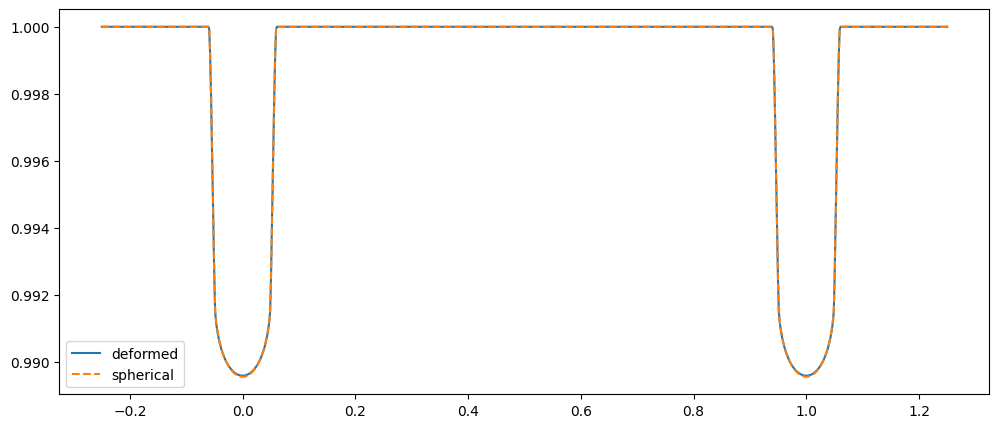

In [10]:
plt.figure(figsize=(12,5))
plt.plot(time, def_transit, label="deformed")
plt.plot(time, sph_transit,"--", label="spherical")
plt.legend()

Text(0, 0.5, 'diff [ppm]')

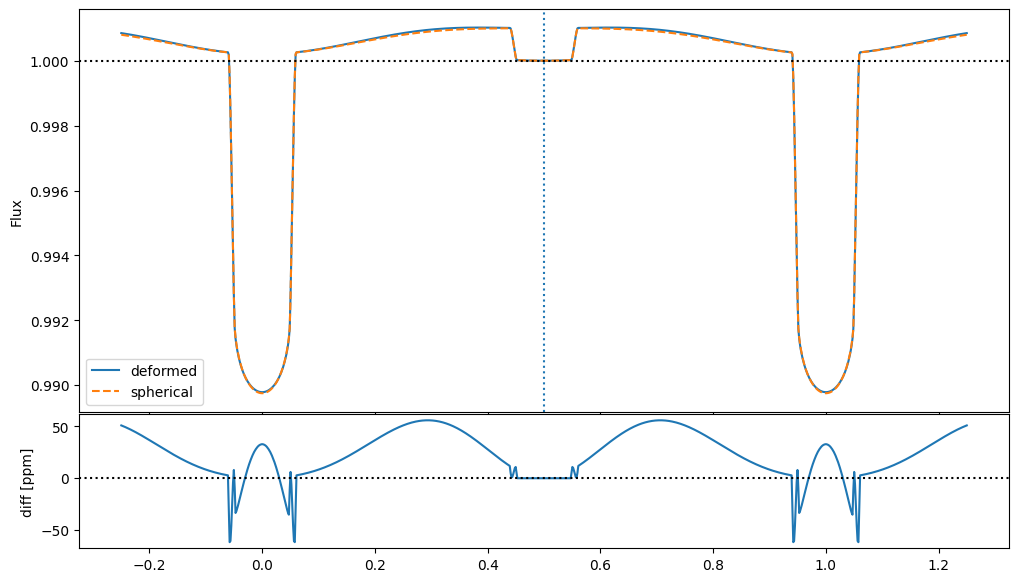

In [11]:
fig,ax=plt.subplots(2,1,figsize=(12,7), gridspec_kw={"hspace":0.01, "height_ratios":[3,1]})

def_phase_curve = def_PC.phase_curve(time, def_PC.pars)
sph_phase_curve = sph_PC.phase_curve(time, sph_PC.pars)

ax[0].plot(time, def_phase_curve, label="deformed")
ax[0].plot(time, sph_phase_curve,"--", label="spherical")
ax[0].axvline(0.5,ls=":")
ax[0].axhline(1,ls=":", color="k")
ax[0].set_ylabel("Flux")
ax[0].legend()

ax[1].plot(time, (def_phase_curve - sph_phase_curve)*1e6)
ax[1].axhline(0,ls=":", color="k")
ax[1].set_ylabel("diff [ppm]")



Note that the difference curve would be difference curve would appear different if the spherical planet model was used to fit the deformed planet phase curve

show  phase curve contributions

In [12]:
def_atm_signal, ellip_signal, DB_signal, pc_def_contrib = def_PC.phase_curve(time, def_PC.pars,return_components=True)
sph_atm_signal, ellip_signal, DB_signal, pc_def_contrib = sph_PC.phase_curve(time, sph_PC.pars,return_components=True)


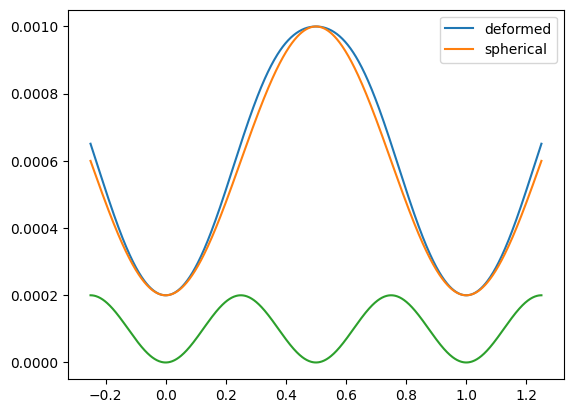

In [13]:
#atmospheric phase variation from the deformed and spherical planet
plt.plot(time, def_atm_signal, label="deformed")
plt.plot(time, sph_atm_signal, label="spherical")
plt.legend();

plt.plot(time, ellip_signal, label="EV")

plot the projected planet area

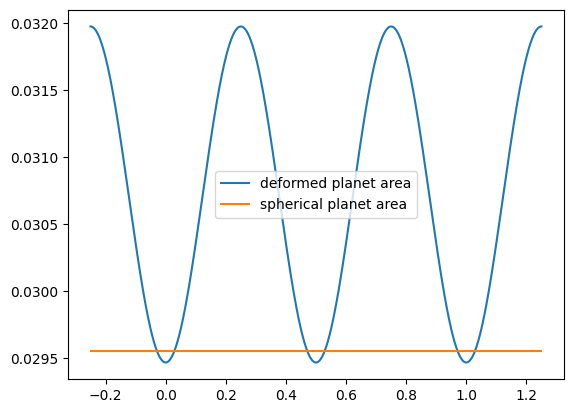

In [14]:
def_area = def_PC.projected_planet_area(def_PC.pars)
sph_area = sph_PC.projected_planet_area(sph_PC.pars)

plt.plot(time,def_area, label="deformed planet area")
plt.plot(time,sph_area, label="spherical planet area")
plt.legend()

Text(0.5, 1.0, 'Planet Area normalized to spherical planet area')

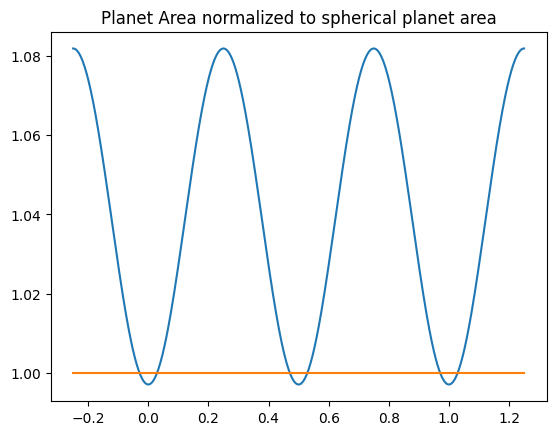

In [17]:
plt.plot(time,def_area/sph_area, label="normalized deformed planet area")
plt.plot(time,sph_area/sph_area, label="spherical planet area")
plt.title("Planet Area normalized to spherical planet area")